<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingEx_02_ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Assignment 2: Image Enhancement

Before we start, please put your names and IDs in following format

: Firstname LASTNAME, #00000000   //   (e.g.) Dana LEVI, #12345678

**Your Answer:**   
Xxxxx XXXXX, #nnnnnn

In this exercise you will implement the **Image Enhancement** algorithms.

Methods: as explained in class.

Notes:
*   Write your code in the dedicated areas (TODO blocks). You can add helper functions.
*   Submission email should include a link to Colab submission notebook located on your Google Drive with Commenter access right to nev1958a@gmail.com
*   The solution notebook should be able to be run (‘Run all’) with no errors.
In case of errors, the submission will be disqualified.
*   Grade will depend on correct performance on several grayscale images and on clean programming and documentation.
*   Do not forget to add the Names and Student I.D. at the top of the notebook.
*   All images are given as 2 dimensional matrices of type `float`, with values in range [0..1].
*   Pay Attention! In the following functions the returned images must be with the same size as the original Images!

Please implement the following fuctions:
1. Write the `my_median` function that apply a median filter with a given size on an image. Make sure that you do not use the builtin median function (you have to implement it by yourself). You can use the builtin sort function.
2. Write the `gauss_enhance` function which receive an image and add gaussian noise to the image with mean value 0, and var=0.004, and then try to enhance the image using the directional smoothing as explained in the class. It is up to you, to choose the right directional filters (size, orientation, and values). On the docstring of this function you should write which filters does this function use. The function should return 2 images. the first one is the enhanced image (`img_e`), and the second one is the noisy image (`img_n`).
3. Write the `shapes_enhance` function which receive an image and add shaped noise given by the following matrix:
```python
    1,0,0,0,1
    0,1,0,1,0
    0,0,1,0,0
    0,1,0,1,0
    1,0,0,0,1
```

. The density of the shapes should be 0.003 (used in the `sp_noise` function). The fuction should then try to enhance the image using `my_median` filter (which filter works best?). On the docstring of this function you should write the dimension of the median filter that this function use (rows X cols). The function should return 2 images. the first one is the enhanced image (`img_e`), and the second one is the noisy image (`img_n`). **Note:** The filter shape should be as minimal as possible (to minimize unecessary smoothing)!

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You will need to rerun this setup code each time you start the notebook.

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL
import random
from scipy.signal import convolve

In [ ]:
random.seed(3)
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [ ]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image 
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
def plot_images(img:np.array, img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 10))
    axes[0].imshow(img,  cmap='gray')
    axes[1].imshow(img1,  cmap='gray')
    axes[2].imshow(img2,  cmap='gray')

In [ ]:
def sp_noise(img:np.array, d:float=0.003) -> np.array:
    '''
    add 'salt & pepper' noise with density d to an image, imnoise first assigns 
    each pixel a random probability value from a standard uniform distribution 
    on the open interval (0, 1).
    For pixels with probability value in the range (0, d/2), the pixel value is 
      set to 0. The number of pixels that are set to 0 is 
      approximately d*numel(I)/2.
    For pixels with probability value in the range [d/2, d), the pixel value is 
      set to the maximum value of the image data type. The number of pixels that 
      are set to the maximum value is approximately d*numel(I)/2.
    For pixels with probability value in the range [d, 1), the pixel value is 
      unchanged.
    Args:
        img: image in float format (range: 0..1)
    Returns:
        img1: in float format (range: 0..1) - s&p noised image
    '''
    img1 = img.copy()
    nrows, ncols = img.shape
    for i in range(nrows):
        for j in range(ncols):
            rdn = random.random()
            if rdn <= d/2:
                img1[i][j] = 0.0
            elif d/2 < rdn < d:
                img1[i][j] = 1.0
            else:
                img1[i][j] = img[i][j]
    return img1

In [ ]:
img = read_file(file_name='house.tiff')

## `my_median`

In [ ]:
def my_median(img: np.array, filter_nrows:int, filter_ncols:int) -> np.array:
    '''
    This function applies a median filter of size (rows, cols) and returns the 
    new image as a result.
    Args:
        img: image in float format (range: 0..1) - the image to enhance
        filter_nrows: number of rows of the median filter.
        filter_ncols: number of columns of the median filter.

    Returns:
        img_new: in float format (range: 0..1) - the enhanced image
    '''
    ######################################################################
    # TODO: Implement image enhancement using median filter.
    ######################################################################
    pass
    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################

    return img_new

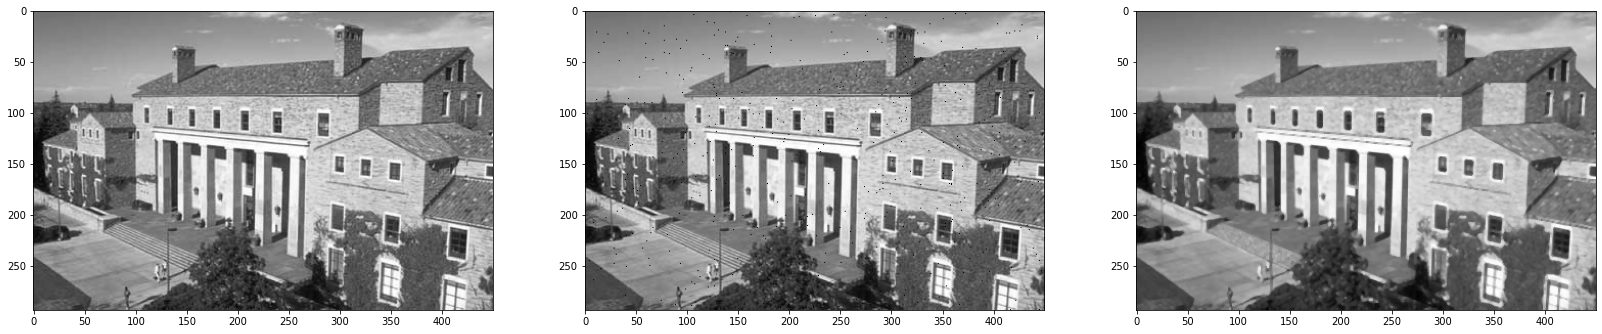

In [ ]:
img_sp = sp_noise(img, d=0.003)
img_sp_e = my_median(img_sp, 3, 3)
plot_images(img/255, img_sp, img_sp_e)

## `gauss_enhance`

In [ ]:
def gauss_enhance(img: np.array) -> (np.array, np.array):
    '''
    This function receives an image and add gaussian noise to the image with 
    mean value 0.0, and var=0.04, and then try to enhance the image using the 
    directional smoothing as explained in the class. It is up to you, to choose 
    the right directional filters (size, orientation, and values). On the 
    docstring of this function you should write which filters does this function 
    use.
    Args:
        img: in float format (range: 0..1) - the image to enhance

    Returns:
        img_e: in float format (range: 0..1) - the enhanced image.
        img_n: in float format (range: 0..1) - the noisy image.
    '''
    ######################################################################
    # TODO: Implement image enhancement using Gaussian filter.
    ######################################################################
    pass
    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################
    return img_e, img_n

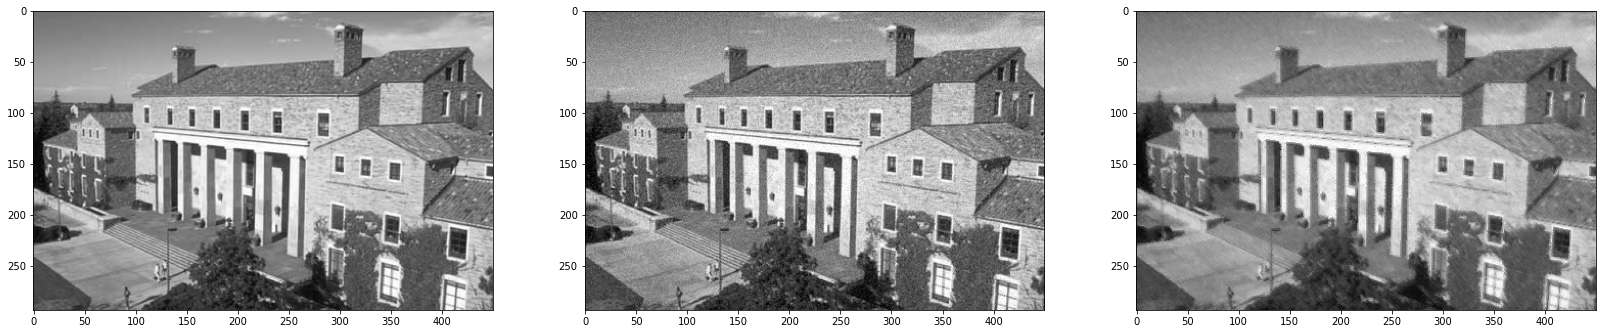

In [ ]:
img_e, img_n = gauss_enhance(img / 255.0)
plot_images(img/255.0, img_n, img_e)

##shapes_enhance

In [ ]:
def shapes_enhance(img: np.array) -> (np.array, np.array):
    '''
    This function receives an image and add shaped noise given by the following 
    matrix: [[1,0,0,0,1],
            [0,1,0,1,0],
            [0,0,1,0,0],
            [0,1,0,1,0],
            [1,0,0,0,1]]
    The density of the shapes should be 0.003 (used in the `sp_noise` function).
    The fuction should then try to enhance the image using `my_median` filter 
    (which filter works best?). On the docstring of this function you should 
    write the dimension of the median filter that this function use (rows X cols).

    Args:
        img: in float format (range: 0..1) - the image to enhance

    Returns:
        img_e: in float format (range: 0..1) - the enhanced image.
        img_n: in float format (range: 0..1) - the noisy image.
    '''
    ######################################################################
    # TODO: Implement image enhancement using shapes_enhance.
    ######################################################################
    pass
    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################
    return img_e, img_n

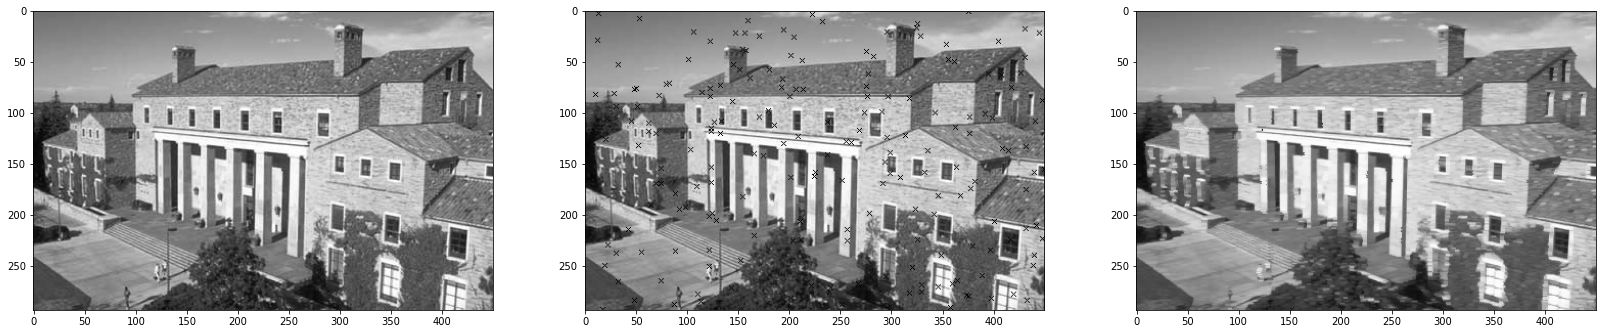

In [ ]:
img_e, img_n = shapes_enhance(img/255)
plot_images(img/255, img_n, img_e)